## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Ratings Dataset

In [7]:
ratings_cols = ['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/ratings.dat', sep='::', encoding='latin-1',names=ratings_cols)
print ('Shape of ratings:{}'.format(ratings.shape))
ratings = ratings.drop('Timestamp',axis=1)
ratings.head()

Shape of ratings:(1000209, 4)


,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


### Users Dataset

In [2]:
users_cols = ['UserID','Gender','Age','Occupation','Zip_code']
users = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/users.dat', sep='::', encoding='latin-1',names=users_cols)
print ('Shape of users:{}'.format(users.shape))
users.head()

Shape of users:(6040, 5)


,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
users['Gender'].replace({'F':0,'M':1},inplace=True)
users['Age'].replace({1: "Under 18",18: "18-24",25: "25-34",35: "35-44",45: "45-49",50: "50-55",56: "56+"},inplace=True)
users['Occupation'].replace({0: "other or not specified",1: "academic/educator",2: "artist",\
                             3: "clerical/admin",4: "college/grad student",5: "customer service",\
                             6: "doctor/health care",7: "executive/managerial",8: "farmer",\
                             9: "homemaker",10: "K-12 student",11: "lawyer",12: "programmer",\
                             13: "retired",14: "sales/marketing",15: "scientist",16: "self-employed",\
                             17: "technician/engineer",18: "tradesman/craftsman",19: "unemployed",20: "writer"},inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip_code
0,1,0,Under 18,K-12 student,48067
1,2,1,56+,self-employed,70072
2,3,1,25-34,scientist,55117
3,4,1,45-49,executive/managerial,02460
4,5,1,25-34,writer,55455


### Movies Dataset

In [5]:

movies_cols = ['MovieID','Title','Genres']
movies = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/movies.dat',sep='::',names=movies_cols)
print ('Shape of movies:{}'.format(movies.shape))
movies.head()

Shape of movies:(3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


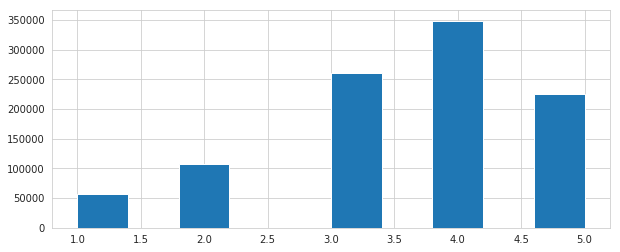

In [6]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=10);

In [7]:
df = pd.merge(ratings,movies,on='MovieID')
df.head()

,UserID,MovieID,Rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

In [9]:
df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()


Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [10]:
grading = pd.DataFrame(df.groupby('Title')['Rating'].mean())
grading.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [11]:
grading['num of ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
grading.head()

,Rating,num of ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


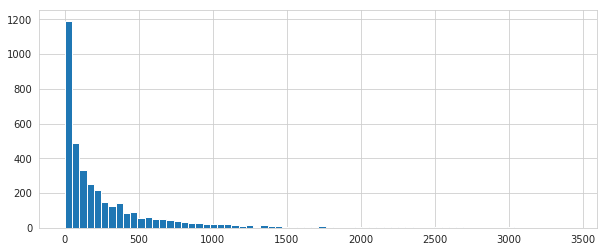

In [12]:
plt.figure(figsize=(10,4))
grading['num of ratings'].hist(bins=70);

In [13]:
# Break up the big genre string into a string array
movies['Genres'] = movies['Genres'].str.split('|')
# Convert genres to string value
movies['Genres'] = movies['Genres'].fillna("").astype('str')

**TF-IDF : Term Frequency - Inverse Document Frequency**<br>

Intution behind IF-IDF
Equation of TF-IDF

$$\large
    TF_{(t_{i})} = \frac{Number\;of\;times\; term\; t_{t} \;appears\; in \;a \;document}{Total\; number\; of\; terms\; in\; the\; document }
$$
$$\large
    IDF_{(t_{i})} = \log_{10}\frac{Total\;number\;of\;documents}{Number\;of\; documents\; with\; term\; t_{i}\;in\; it} 
$$
$$
    {TF}\times{IDF}= (\frac{Number\;of\;times\; term\; t_{i} \;appears\; in \;a \;document}{Total\; number\; of\; terms\; in\; the\; document })\;\times\;
    {\log_{10}(\frac{Total\;number\;of\;documents}{Number\;of\; documents\; with\; term\; t_{i}\;in\; it})}
    $$


In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['Genres'])
tfidf_matrix.shape

(3883, 303)

### Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.<br>

**Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.**

###  http://scikit-learn.org/stable/modules/metrics.html#linear-kernel

In [15]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [16]:
# Build a 1-dimensional array with movie titles
titles = movies['Title']
indices = pd.Series(movies.index, index=movies['Title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [17]:
genre_recommendations('Jumanji (1995)')

55          Kids of the Round Table (1995)
59      Indian in the Cupboard, The (1995)
124      NeverEnding Story III, The (1994)
996        Escape to Witch Mountain (1975)
1898                      Labyrinth (1986)
Name: Title, dtype: object

In [25]:

genre_recommendations("Star Trek: The Wrath of Khan (1982)")

313                          Stargate (1994)
325            Star Trek: Generations (1994)
476                     Jurassic Park (1993)
1335         Star Trek: First Contact (1996)
1350    Star Trek: The Motion Picture (1979)
Name: Title, dtype: object